<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/University_of_Los_Andes_logo.svg/1200px-University_of_Los_Andes_logo.svg.png" width="70" align="left"> 
  <h1> DEPARTAMENTO DE INGENIERIA INDUSTRIAL <br>
   Estructura de Redes Sociales 2023-20 <br> </h1>
 
 **PROFESORES:** Felipe Montes - Andrés Felipe Useche - Ana María Guerra - Martha Blanco - Paula Cortés

<h1><center> Taller 2 </center></h1>
<h2><center>Evaluar propiedades de la red a partir de sus medidas estructurales y su topología</center></h2>

En esta actividad ustedes trabajarán con los principios detrás de la teoría de detección de comunidades. Sigan las instrucciones para desarrollar la actividad, escriban su código de forma ordenada y bien comentada. Les sugerimos agregen sus argumentaciones en los *Markdown’s* desigandos para ello.

Star Wars es una emblemática saga que ha marcado un hito en la ciencia ficción y la cultura cinematográfica. Hoy en día continúa siendo un fenómeno global gracias a su profunda inmersión en un universo que trasciende generaciones. Producida inicialmente como una serie de películas, esta saga ha creado un vasto universo que se destaca no solo por su narrativa épica, sino también por las intrincadas relaciones e interacciones que existen dentro de su red de personajes.

Adjunto encontrará dos archivos .csv que juntos contienen la red social de los personajes de Stars Wars extraída de los guiones de las películas. En resumen, dos personajes están conectados si han hablado dentro de la misma escena de alguno de los episodios del I al VII. La información que contiene cada archivo se explica a continuación:

* **Nodes_SW.csv** contiene la información de los personajes de las peliculas: 
    - name: Nombre del personaje
    - value: Numero de escenas en el que el personaje ha aparecido
    - colour: Color de identificación

* **Edges_SW.csv** contiene la información de las conexiones entre personajes: 
    - Source: Origen
    - Target: Destino 
    - value: Número de escenas donde el "personaje origen" y el "personaje destino" del enlace aparecen juntos. 
    
Tenga en cuenta que la red es no dirigida. El personaje que representa el origen y el destino es arbitrario, por lo que solo corresponden a los dos extremos del enlace.

**1. Carguen la red de Stars Wars adjunta como una red no dirigida**

In [36]:
# Librerías

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
!pip install python-louvain
import community
import random
import numpy as np

In [2]:
# Cargar información de nodos y arcos

# Cargar el archivo Nodes_SW.csv
nodes_df = pd.read_csv('Nodes_SW.csv')

# Cargar el archivo Edges_SW.csv
edges_df = pd.read_csv('Edges_SW.csv')


In [3]:
# Construir red

# Crear un objeto de gráfico no dirigido
G = nx.Graph()

# Agregar nodos al gráfico con atributos
for _, row in nodes_df.iterrows():
    G.add_node(row['name'], value=row['value'], colour=row['colour'])

# Agregar aristas al gráfico con atributos
for _, row in edges_df.iterrows():
    G.add_edge(nodes_df.loc[row['source'], "name"], nodes_df.loc[row['target'], "name"], value=row['value'])

**2. Visualicen la red mostrando en cada nodo las iniciales de cada persona. Utilice las funciones de la libreria Matplotlib para esto. Solamente observando la estructura de la red sin un análisis previo, ¿qué podría concluir al respecto de esta red?**

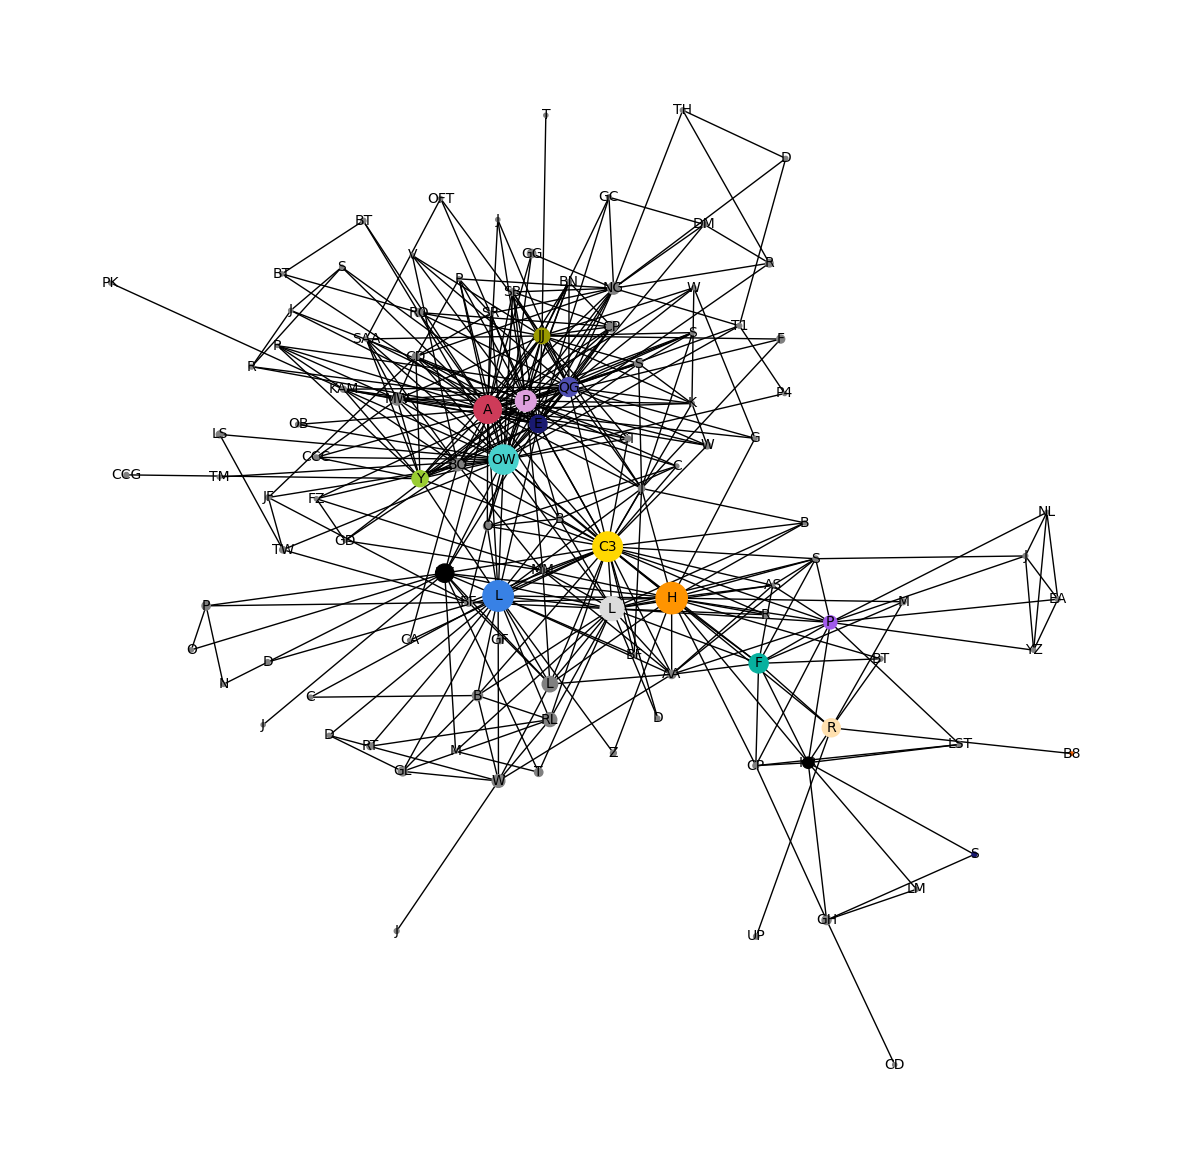

In [4]:
# Espacio para el código

# Crear un diccionario de mapeo de nombres a iniciales
initials_dict = {name: ''.join(word[0].upper() for word in name.replace("-"," ").split()) for name in G.nodes}

# Usar kamada_kawai_layout para la disposición
pos = nx.kamada_kawai_layout(G)  # Algoritmo de disposición para una visualización ordenada

# Personalizar la apariencia de los nodos
node_labels = {node: initials for node, initials in initials_dict.items()}
node_colors = [G.nodes[node]['colour'] for node in G.nodes]
node_size = [G.nodes[node]['value']*3 for node in G.nodes]

plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

plt.axis('off')  # Ocultar ejes
plt.show()

La red exhibe una estructura centralizada, donde algunos personajes prominentes, como Obi Wan, tienen muchas conexiones, lo que sugiere que desempeñan un papel protagónico en la trama. La presencia de nodos más grandes que representan personajes influyentes respalda esta idea. Los personajes que aparecen en más escenas y tienen conexiones con otros personajes tienden a ser más influyentes en la saga. Su participación activa en múltiples interacciones puede indicar que desempeñan un papel crucial en el desarrollo de la historia y en la relación entre los personajes. Esta estructura centralizada puede ser característica de muchas narrativas, donde ciertos personajes son fundamentales para avanzar en la trama y conectan a otros personajes en la historia..Es importante destacar que, además de los personajes centrales, también puede haber grupos de personajes que formen comunidades o subtramas dentro de la red. Explorar estas subestructuras puede proporcionar una comprensión más profunda de cómo se desarrolla la trama de Star Wars y cómo interactúan los personajes en diferentes contextos.

**3. Calculen el diámetro de la red. ¿Qué le dice el diámetro sobre la comunicación en esta red?**

***Nota**: Tengan presente que tienen que verificar que la red esté completamente conectada y en caso que no lo esté utilizar el componente conectado más grande.*

In [5]:

# Verificar si la red está completamente conectada
is_fully_connected = nx.is_connected(G)

if is_fully_connected:
    print("La red está completamente conectada.")
else:
    print("La red no está completamente conectada.")
    
# Encontrar componentes conectados
connected_components = list(nx.connected_components(G))

if len(connected_components) == 1:
    print("La red está completamente conectada.")
else:
    print("La red no está completamente conectada.")
    for i, component in enumerate(connected_components):
        print(f"Componente {i + 1}:")
        print(component)
        
# Verificar si hay al menos 2 componentes antes de intentar acceder al "Componente 2"
if len(connected_components) >= 2:
    # Identificar el componente que deseas eliminar (componente 2 en este caso)
    component_to_remove = connected_components[1]  # El índice 1 representa el componente 2

    # Eliminar los nodos del componente 2 del grafo
    G.remove_nodes_from(component_to_remove)

    print(f"Se han eliminado los nodos del Componente 2 del grafo.")
else:
    print("No hay suficientes componentes conectados para eliminar el Componente 2.")
    
# Calcular el diámetro de la red
diameter = nx.diameter(G)

print(f"El diámetro de la red es: {diameter}")





La red no está completamente conectada.
La red no está completamente conectada.
Componente 1:
{'BAIL ORGANA', 'FODE/BEED', 'ZEV', 'CAPTAIN PANAKA', 'RABE', 'SNAP', 'PADME', 'NUTE GUNRAY', 'SENATOR ASK AAK', 'OBI-WAN', 'BALA-TIK', 'MAZ', 'WATTO', 'BIGGS', 'ADMIRAL STATURA', 'JIRA', 'ORN FREE TAA', 'RED TEN', 'ELLO ASTY', 'GENERAL HUX', 'WALD', 'JESS', 'TARKIN', 'LANDO', 'DOFINE', 'HAN', 'CAPTAIN ANTILLES', 'GOLD LEADER', 'NIV LEK', 'TEY HOW', 'MACE WINDU', 'TARPALS', 'LOR SAN TEKKA', 'CLONE COMMANDER GREE', 'KITSTER', 'DERLIN', 'SIO BIBBLE', 'FANG ZAR', 'MON MOTHMA', 'ANAKIN', 'TION MEDON', 'SHMI', 'GIDDEAN DANU', 'UNKAR PLUTT', 'TAUN WE', 'CAMIE', 'JANGO FETT', 'JANSON', 'BOUSHH', 'DARTH VADER', 'REY', 'LAMA SU', 'CAPTAIN TYPHO', 'DARTH MAUL', 'LUKE', 'PIETT', 'SUN RIT', 'BB-8', 'LEIA', 'CLIEGG', 'JOBAL', 'OWEN', 'RUNE', 'WEDGE', 'OZZEL', 'GENERAL CEEL', 'POE', 'QUI-GON', 'CLONE COMMANDER CODY', 'YOLO ZIFF', 'YODA', 'KI-ADI-MUNDI', 'COLONEL DATOO', 'RED LEADER', 'MOTTI', 'GENERAL GRIEV

Un diámetro de red de 6 implica que la distancia máxima entre dos nodos en la red es de 6 pasos. En otras palabras, para llegar desde cualquier nodo a otro en la red, se pueden seguir hasta 6 conexiones o saltos. Esto proporciona información sobre la eficiencia de la comunicación y la conectividad en la red de personajes de Star Wars.



**4. Calculen la densidad de la red ¿Por qué cree que esta red tiene esa densidad? ¿Considera que esta densidad puede estar relacionada con las dinámicas de interacción propias entre los dos lados de la fuerza? Justifique su respuesta**

In [7]:
# Espacio para el código
# Calcular la densidad de la red
density = (2 * len(G.edges)) / (len(G.nodes) * (len(G.nodes) - 1))

print(f"La densidad de la red es: {density}")

La densidad de la red es: 0.06761807679238872


La densidad de la red, que es de aproximadamente 0.0676, indica que solo alrededor del 6.76% de todas las posibles conexiones entre pares de personajes en la red están presentes. En otras palabras, la red es relativamente dispersa y no todos los personajes están directamente conectados entre sí.

Puede que tenga esta densidad debido a que La saga de Star Wars se desarrolla a lo largo de varias generaciones, con personajes que aparecen en diferentes momentos de la línea de tiempo. Esto limita las oportunidades de interacción directa entre personajes de diferentes períodos. Igualmente, la historia de Star Wars se centra en un conjunto principal de personajes, como Luke Skywalker, Princess Leia y Darth Vader. Estos personajes tienen más interacciones y conexiones directas en la trama, mientras que otros personajes pueden tener roles más periféricos.

En el universo de Star Wars, la Fuerza se representa como una dualidad entre el Lado Luminoso (Jedi) y el Lado Oscuro (Sith). Estos dos lados a menudo se ven como opuestos y en conflicto. Esta dualidad puede reflejarse en la red, donde los personajes de cada lado tienden a interactuar principalmente entre ellos y tienen menos interacciones directas con personajes del otro lado.



**5. Apliquen la detección por comunidades por el método de Louvain y visualicen las comunidades diferenciandolas por color. ¿Qué cree que están representando las comunidades en esta red?**

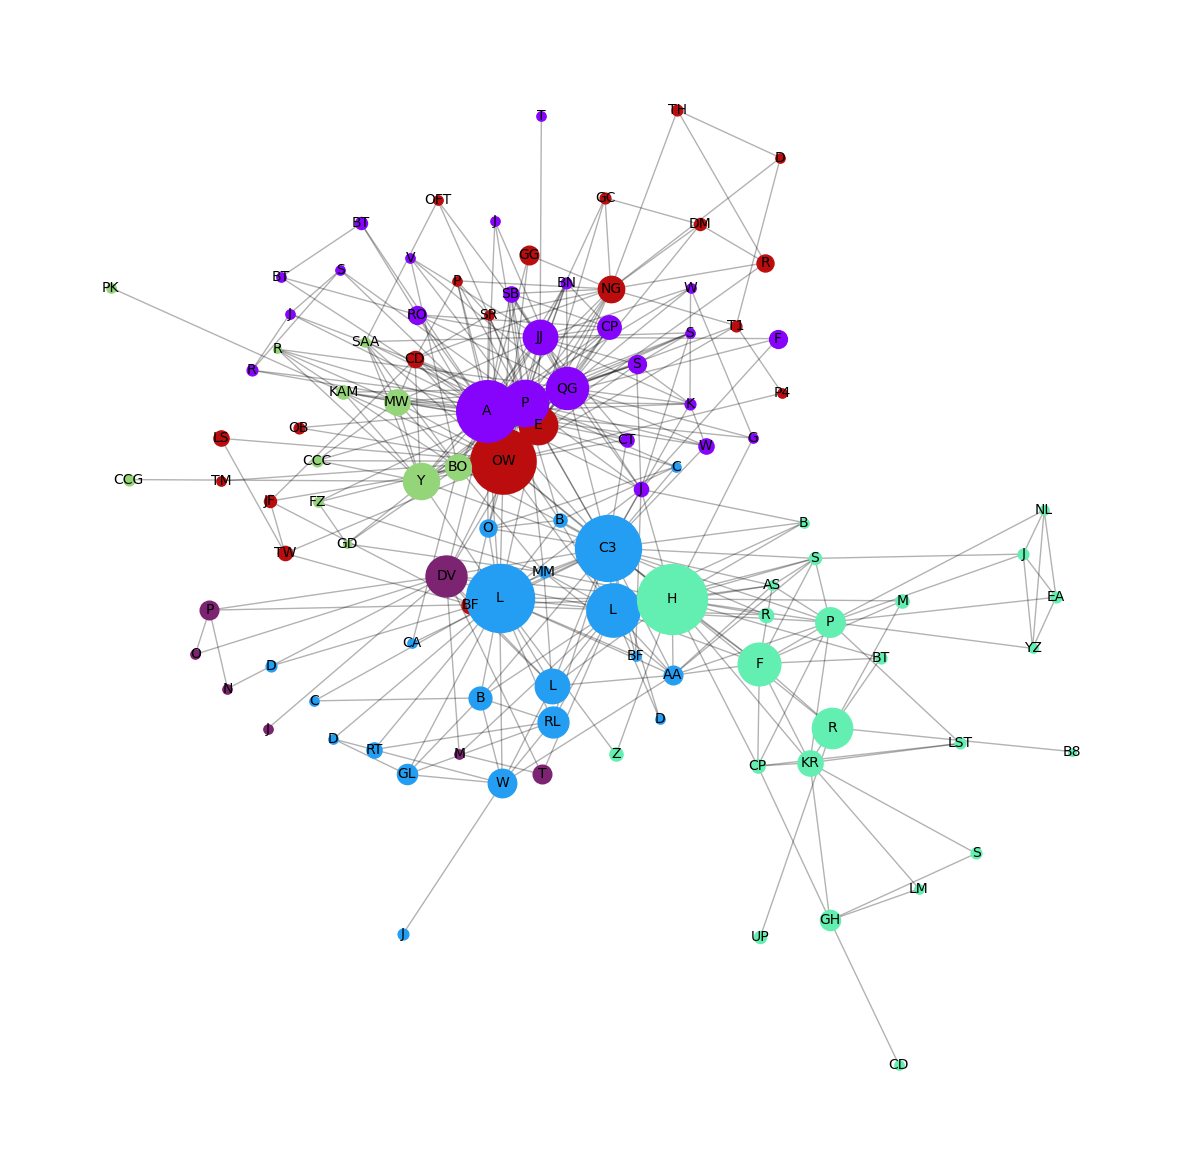

In [13]:
# Ejecutar el algoritmo de Louvain para detectar comunidades
partition = community.best_partition(G)

# Crear un diccionario que mapee nodos a comunidades
node_to_community = {node: community_id for node, community_id in partition.items()}

# Obtener la lista de comunidades únicas
communities = set(partition.values())

# Crear un mapeo de colores únicos para cada comunidad
community_colors = {community_id: "#" + ''.join(random.choice('0123456789ABCDEF') for _ in range(6)) for community_id in communities}

# Usar kamada_kawai_layout para la disposición
pos = nx.kamada_kawai_layout(G)  # Algoritmo de disposición para una visualización ordenada

# Personalizar la apariencia de los nodos
node_labels = {node: initials for node, initials in initials_dict.items()}
node_size = [G.nodes[node]['value'] * 1 for node in G.nodes]

plt.figure(figsize=(15, 15))

# Dibujar los nodos y etiquetas, asignando colores según la comunidad
for node in G.nodes:
    if node in pos and node in node_labels:
        community_index = node_to_community[node]  # Obtener la comunidad del nodo
        node_value = G.nodes[node]['value'] * 15
        node_color = community_colors[community_index]
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=[node_color], node_size=node_value)
        nx.draw_networkx_labels(G, pos, labels={node: node_labels[node]}, font_size=10)

nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.axis('off')  # Ocultar ejes
plt.show()



Las comunidades detectadas en esta red de personajes de Star Wars representan grupos de personajes que tienen conexiones más fuertes o interacciones más frecuentes entre sí en comparación con el resto de la red. Estas comunidades pueden estar reflejando diferentes aspectos de la historia y la trama de Star Wars, así como las relaciones y alianzas entre los personajes.

Algunas comunidades agrupan a personajes que tienden a aparecer juntos en las mismas películas o escenas. Igualmente las comunidades podrían representar alianzas políticas o militares, como la Alianza Rebelde o el Imperio Galáctico.Por último,es posible que algunas comunidades representen personajes que comparten el mismo bando, ya sea Jedi o Sith.


**6. "Normalized Mutual Information"**

En el contexto de redes complejas, la "Normalized Mutual Information" (NMI) es una medida usada para cuantificar la similitud entre dos particiones de una red. Esta medida es comúnmente empleada para evaluar el rendimiento de los algoritmos de detección de comunidades, que buscan identificar grupos de nodos densamente conectados dentro de la red. A partir de esta información desarrolle los siguientes literales:

- **a. Clasifiquen a los personajes según el bando al que pertenecen (Jedi o Sith) y posteriomente calculen el normalized mutual information entre el atributo creado y los siguiente dos elementos: grado y comunidades.**

**Ayuda:** *Para calcular la NMI pueden utilizar la función sklearn.metrics.normalized_mutual_info_score detallada en el siguiente enlace https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html*

In [23]:
from sklearn.metrics.cluster import normalized_mutual_info_score

In [27]:
# Bando de cada personaje según ChatGPT
bando_personajes = {
    'BAIL ORGANA': 'Ninguno',
    'FODE/BEED': 'Ninguno',
    'ZEV': 'Ninguno',
    'CAPTAIN PANAKA': 'Ninguno',
    'RABE': 'Ninguno',
    'SNAP': 'Ninguno',
    'PADME': 'Ninguno',
    'NUTE GUNRAY': 'Ninguno',
    'SENATOR ASK AAK': 'Ninguno',
    'OBI-WAN': 'Jedi',
    'BALA-TIK': 'Ninguno',
    'MAZ': 'Ninguno',
    'WATTO': 'Ninguno',
    'BIGGS': 'Ninguno',
    'ADMIRAL STATURA': 'Ninguno',
    'JIRA': 'Ninguno',
    'ORN FREE TAA': 'Ninguno',
    'RED TEN': 'Ninguno',
    'ELLO ASTY': 'Ninguno',
    'GENERAL HUX': 'Ninguno',
    'WALD': 'Ninguno',
    'JESS': 'Ninguno',
    'TARKIN': 'Ninguno',
    'LANDO': 'Ninguno',
    'DOFINE': 'Ninguno',
    'HAN': 'Ninguno',
    'CAPTAIN ANTILLES': 'Ninguno',
    'GOLD LEADER': 'Ninguno',
    'NIV LEK': 'Ninguno',
    'TEY HOW': 'Ninguno',
    'MACE WINDU': 'Jedi',
    'TARPALS': 'Ninguno',
    'LOR SAN TEKKA': 'Ninguno',
    'CLONE COMMANDER GREE': 'Ninguno',
    'KITSTER': 'Ninguno',
    'DERLIN': 'Ninguno',
    'SIO BIBBLE': 'Ninguno',
    'FANG ZAR': 'Ninguno',
    'MON MOTHMA': 'Ninguno',
    'ANAKIN': 'Jedi',
    'TION MEDON': 'Ninguno',
    'SHMI': 'Ninguno',
    'GIDDEAN DANU': 'Ninguno',
    'UNKAR PLUTT': 'Ninguno',
    'TAUN WE': 'Ninguno',
    'CAMIE': 'Ninguno',
    'JANGO FETT': 'Ninguno',
    'JANSON': 'Ninguno',
    'BOUSHH': 'Ninguno',
    'DARTH VADER': 'Sith',
    'REY': 'Ninguno',
    'LAMA SU': 'Ninguno',
    'CAPTAIN TYPHO': 'Ninguno',
    'DARTH MAUL': 'Sith',
    'LUKE': 'Jedi',
    'PIETT': 'Ninguno',
    'SUN RIT': 'Ninguno',
    'BB-8': 'Ninguno',
    'LEIA': 'Ninguno',
    'CLIEGG': 'Ninguno',
    'JOBAL': 'Ninguno',
    'OWEN': 'Ninguno',
    'RUNE': 'Ninguno',
    'WEDGE': 'Ninguno',
    'OZZEL': 'Ninguno',
    'GENERAL CEEL': 'Ninguno',
    'POE': 'Ninguno',
    'QUI-GON': 'Jedi',
    'CLONE COMMANDER CODY': 'Ninguno',
    'YOLO ZIFF': 'Ninguno',
    'YODA': 'Jedi',
    'KI-ADI-MUNDI': 'Jedi',
    'COLONEL DATOO': 'Ninguno',
    'RED LEADER': 'Ninguno',
    'MOTTI': 'Ninguno',
    'GENERAL GRIEVOUS': 'Sith',
    'C-3PO': 'Ninguno',
    'BRAVO TWO': 'Ninguno',
    'COUNT DOOKU': 'Sith',
    'BOSS NASS': 'Ninguno',
    'BIB FORTUNA': 'Ninguno',
    'DACK': 'Ninguno',
    'VALORUM': 'Ninguno',
    'BOBA FETT': 'Ninguno',
    'JABBA': 'Ninguno',
    'TC-14': 'Ninguno',
    'CAPTAIN PHASMA': 'Ninguno',
    'SEBULBA': 'Ninguno',
    'BRAVO THREE': 'Ninguno',
    'BERU': 'Ninguno',
    'POGGLE': 'Ninguno',
    'ADMIRAL ACKBAR': 'Ninguno',
    'SOLA': 'Ninguno',
    'DODONNA': 'Ninguno',
    'JERJERROD': 'Ninguno',
    'RIEEKAN': 'Ninguno',
    'NEEDA': 'Ninguno',
    'GREEDO': 'Ninguno',
    'PLO KOON': 'Jedi',
    'KYLO REN': 'Sith',
    'LIEUTENANT MITAKA': 'Ninguno',
    'PK-4': 'Ninguno',
    'ODD BALL': 'Ninguno',
    'RIC OLIE': 'Ninguno',
    'FINN': 'Ninguno',
    'RUWEE': 'Ninguno',
    'EMPEROR': 'Sith',
    'SNOKE': 'Ninguno',
    'JAR JAR': 'Ninguno'
}

print("Jedi:", ", ".join(filter(lambda x:bando_personajes[x]=="Jedi", G.nodes)))
print("Sith:", ", ".join(filter(lambda x:bando_personajes[x]=="Sith", G.nodes)))

Jedi: QUI-GON, OBI-WAN, ANAKIN, MACE WINDU, KI-ADI-MUNDI, YODA, PLO KOON, LUKE
Sith: EMPEROR, DARTH MAUL, COUNT DOOKU, GENERAL GRIEVOUS, DARTH VADER, KYLO REN


In [55]:
# Clasificar

# Filtrar los personajes Jedi y Sith
personajes_jedi_sith = {nombre: bando_personajes[nombre] for nombre in G.nodes() if bando_personajes.get(nombre) in ['Jedi', 'Sith']}

# Obtener los bandos, grados y comunidades solo para Jedi y Sith
bandos = list(personajes_jedi_sith.values())
grados = list(dict(G.degree(personajes_jedi_sith.keys())).values())
comunidades = [node_to_community[nombre] for nombre in personajes_jedi_sith.keys()]

In [56]:
# Determinar NMI

# Calcular NMI entre bandos y grados para Jedi y Sith
nmi_bando_grado = normalized_mutual_info_score(bandos, grados)

# Calcular NMI entre bandos y comunidades para Jedi y Sith
nmi_bando_comunidades = normalized_mutual_info_score(bandos, comunidades)

print("NMI entre bandos y grados (Jedi/Sith):", nmi_bando_grado)
print("NMI entre bandos y comunidades (Jedi/Sith):", nmi_bando_comunidades)


NMI entre bandos y grados (Jedi/Sith): 0.36233146148124606
NMI entre bandos y comunidades (Jedi/Sith): 0.4477613546351566


- **b. ¿Qué pueden concluir con respecto al indicador y el grado obtenido? Comparen los resultados con los obtenidos en el punto 4**

Un valor de NMI de 0.3623 sugiere que existe cierta relación o similitud moderada entre la clasificación de los personajes en Jedi o Sith y sus grados en la red. Esto significa que, en general, los personajes Jedi y Sith tienden a tener niveles de grado que están algo relacionados con su bando.
Sin embargo, el valor no es extremadamente alto, lo que indica que la relación no es muy fuerte. Esto podría significar que hay personajes Jedi con grados bajos y personajes Sith con grados altos, y viceversa, lo que sugiere que el grado por sí solo no es una característica determinante para clasificar a los personajes en estos bandos.

Un valor de NMI de 0.4478 es más alto que el anterior, lo que indica que la clasificación de los personajes en Jedi o Sith está más relacionada con la estructura de comunidades detectada en la red.Esto sugiere que, en la red, los personajes Jedi tienden a agruparse en comunidades distintas de aquellas en las que se agrupan los personajes Sith. En otras palabras, la estructura de comunidades en la red parece capturar mejor la distinción entre Jedi y Sith en comparación con el grado de los personajes.

Los valores de NMI son más altos que la densidad de la red. Esto significa que, a pesar de que la red es dispersa y tiene pocas conexiones, los atributos de clasificación de los personajes en Jedi o Sith están más relacionados con la estructura de comunidades y los grados de los nodos que con la densidad en sí misma.

**7. Identifiquen los 10 nodos más intermediadores en esta red ¿Qué cree que representan estas personas en la red?**

In [30]:
# Calcular la intermediación de los nodos
betweenness = nx.betweenness_centrality(G)

# Obtener los 10 nodos más intermediadores
top_10_betweenness = [node for node, centrality in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]]

# Imprimir los 10 nodos más intermediadores
print("Los 10 nodos más intermediadores son:")
for i, node in enumerate(top_10_betweenness, 1):
    print(f"{i}. {node} - Betweenness Centrality: {betweenness[node]}")

Los 10 nodos más intermediadores son:
1. OBI-WAN - Betweenness Centrality: 0.21687680929893424
2. C-3PO - Betweenness Centrality: 0.196282359938358
3. HAN - Betweenness Centrality: 0.18460259986082694
4. ANAKIN - Betweenness Centrality: 0.16520206976527324
5. LUKE - Betweenness Centrality: 0.1403977226378198
6. DARTH VADER - Betweenness Centrality: 0.08969763196496765
7. POE - Betweenness Centrality: 0.08518104645812825
8. EMPEROR - Betweenness Centrality: 0.07572278832708307
9. PADME - Betweenness Centrality: 0.07076777993735174
10. KYLO REN - Betweenness Centrality: 0.05751638778332321


Los 10 nodos más intermediadores en esta red son aquellos personajes que tienen una alta intermediación (betweenness centrality). La intermediación mide cuántas veces un nodo actúa como puente en el camino más corto entre otros nodos en la red. En este contexto, estos personajes son importantes en términos de facilitar la comunicación o la conexión entre otros personajes en la red.

Estos personajes podrían representar a aquellos que tienen un papel importante en la conexión entre otros personajes en la trama de Star Wars. Tienen la capacidad de influir en la comunicación o las relaciones entre diferentes facciones o grupos de personajes en la historia. Esto podría indicar que desempeñan un papel clave en el desarrollo de la trama y en la interacción entre los personajes en la saga.

**8. El "grado interno" y "grado externo" son medidas utilizadas para describir la cantidad de conexiones que un nodo tiene dentro de su comunidad (grado interno) y con nodos de otras comunidades (grado externo). Con base en lo anterior, calculen el grado interno y externo de cada nodo de la red.**

In [34]:
# Inicializar diccionarios para el grado interno y externo de cada nodo
internal_degree = {}
external_degree = {}

# Calcular el grado interno y externo de cada nodo
for node in G.nodes:
    community_id = node_to_community[node]
    internal_degree[node] = sum(1 for neighbor in G.neighbors(node) if node_to_community[neighbor] == community_id)
    external_degree[node] = sum(1 for neighbor in G.neighbors(node) if node_to_community[neighbor] != community_id)

# Imprimir el grado interno y externo de cada nodo
for node in G.nodes:
    print(f"Nodo: {node}")
    print(f"Grado Interno: {internal_degree[node]}")
    print(f"Grado Externo: {external_degree[node]}")
    print()

Nodo: QUI-GON
Grado Interno: 16
Grado Externo: 10

Nodo: NUTE GUNRAY
Grado Interno: 12
Grado Externo: 4

Nodo: PK-4
Grado Interno: 2
Grado Externo: 0

Nodo: TC-14
Grado Interno: 4
Grado Externo: 1

Nodo: OBI-WAN
Grado Interno: 14
Grado Externo: 21

Nodo: DOFINE
Grado Interno: 3
Grado Externo: 0

Nodo: RUNE
Grado Interno: 4
Grado Externo: 0

Nodo: TEY HOW
Grado Interno: 3
Grado Externo: 0

Nodo: EMPEROR
Grado Interno: 7
Grado Externo: 15

Nodo: CAPTAIN PANAKA
Grado Interno: 7
Grado Externo: 2

Nodo: SIO BIBBLE
Grado Interno: 5
Grado Externo: 3

Nodo: JAR JAR
Grado Interno: 16
Grado Externo: 8

Nodo: TARPALS
Grado Interno: 1
Grado Externo: 0

Nodo: BOSS NASS
Grado Interno: 5
Grado Externo: 1

Nodo: PADME
Grado Interno: 17
Grado Externo: 16

Nodo: RIC OLIE
Grado Interno: 6
Grado Externo: 1

Nodo: WATTO
Grado Interno: 4
Grado Externo: 1

Nodo: ANAKIN
Grado Interno: 21
Grado Externo: 20

Nodo: SEBULBA
Grado Interno: 6
Grado Externo: 0

Nodo: JIRA
Grado Interno: 3
Grado Externo: 0

Nodo: SHM

**9. Determinen si los nodos tienen alguno de los siguientes roles utilizando como referencia si se encuentran en el 25% con mayor: 1) Central: grado total, 2) Intermediador: betweenness, 3) Influenciador: page rank, 4) Embajador: grado total externo, 5) Micro influenciador: grado total interno.**

In [39]:
# Calcular el grado total de cada nodo
node_degree = dict(G.degree())

# Calcular la intermediación (betweenness) de cada nodo
betweenness = nx.betweenness_centrality(G)

# Calcular el PageRank de cada nodo
pagerank = nx.pagerank(G)

# Crear diccionario para almacenar los nodos en el 25% superior de cada medida
roles_dict = {
    "Central": [],
    "Intermediador": [],
    "Influenciador": [],
    "Embajador": [],
    "Micro influenciador": []
}

# Calcular el percentil 75 para cada medida
percentile_node_degree = np.percentile(list(node_degree.values()), 75)
percentile_betweenness = np.percentile(list(betweenness.values()), 75)
percentile_pagerank = np.percentile(list(pagerank.values()), 75)
percentile_external_degree = np.percentile(list(external_degree.values()), 75)
percentile_internal_degree = np.percentile(list(internal_degree.values()), 75)

# Identificar nodos en el 25% superior para cada medida y asignarlos a los roles correspondientes
for node in G.nodes:
    if node_degree[node] >= percentile_node_degree:
        roles_dict["Central"].append(node)
    if betweenness[node] >= percentile_betweenness:
        roles_dict["Intermediador"].append(node)
    if pagerank[node] >= percentile_pagerank:
        roles_dict["Influenciador"].append(node)
    if external_degree[node] >= percentile_external_degree:
        roles_dict["Embajador"].append(node)
    if internal_degree[node] >= percentile_internal_degree:
        roles_dict["Micro influenciador"].append(node)

# Imprimir los nodos en el 25% superior para cada medida y su rol correspondiente
for role, nodes in roles_dict.items():
    print(f"Rol: {role}")
    print(f"Nodos en el 25% superior: {nodes}")
    print()

Rol: Central
Nodos en el 25% superior: ['QUI-GON', 'NUTE GUNRAY', 'OBI-WAN', 'EMPEROR', 'CAPTAIN PANAKA', 'SIO BIBBLE', 'JAR JAR', 'PADME', 'ANAKIN', 'SHMI', 'C-3PO', 'KITSTER', 'JABBA', 'MACE WINDU', 'KI-ADI-MUNDI', 'YODA', 'BAIL ORGANA', 'BOBA FETT', 'COUNT DOOKU', 'MON MOTHMA', 'DARTH VADER', 'LUKE', 'LEIA', 'HAN', 'WEDGE', 'LANDO', 'ADMIRAL ACKBAR', 'POE', 'KYLO REN', 'FINN', 'SNAP']

Rol: Intermediador
Nodos en el 25% superior: ['QUI-GON', 'NUTE GUNRAY', 'TC-14', 'OBI-WAN', 'EMPEROR', 'JAR JAR', 'PADME', 'ANAKIN', 'C-3PO', 'JABBA', 'KI-ADI-MUNDI', 'YODA', 'BAIL ORGANA', 'BOBA FETT', 'MON MOTHMA', 'DARTH VADER', 'LUKE', 'LEIA', 'HAN', 'WEDGE', 'ADMIRAL ACKBAR', 'POE', 'KYLO REN', 'CAPTAIN PHASMA', 'FINN', 'REY', 'GENERAL HUX', 'SNAP']

Rol: Influenciador
Nodos en el 25% superior: ['QUI-GON', 'NUTE GUNRAY', 'OBI-WAN', 'EMPEROR', 'JAR JAR', 'PADME', 'ANAKIN', 'C-3PO', 'JABBA', 'MACE WINDU', 'KI-ADI-MUNDI', 'YODA', 'BAIL ORGANA', 'BOBA FETT', 'COUNT DOOKU', 'MON MOTHMA', 'DARTH VADER'

**10. Utilizando los resultados del punto anterior, identifiquen los nodos con mayor cantidad de roles y justifiquen su rol desde la importancia del personaje en las diferentes peliculas de la saga.**

*Por ejemplo, Sansa Stark en GOT puede ser vista como una influenciadora debido a su creciente influencia política y su capacidad para movilizar y persuadir a otros personajes a lo largo de la serie. Además, su rol de intermediaria puede ser evidenciado por su posición única de conectar diferentes grupos y facciones en la serie, facilitando ciertas alianzas y negociaciones.*

In [42]:
# Espacio para el código

# Crear un diccionario para mantener un conjunto de roles para cada nodo
node_roles = {}

# Iterar a través de los roles y asignar los roles a los nodos correspondientes
for role, nodes in roles_dict.items():
    for node in nodes:
        if node in node_roles:
            node_roles[node].add(role)
        else:
            node_roles[node] = {role}

# Encontrar el número máximo de roles que un nodo tiene
max_roles_count = max([len(roles) for roles in node_roles.values()])

# Encontrar los nodos con el máximo número de roles
nodes_with_max_roles = [node for node, roles in node_roles.items() if len(roles) == max_roles_count]

# Imprimir los nodos con el máximo número de roles
print(f"Nodos con el máximo número de roles ({max_roles_count} roles):")
for node in nodes_with_max_roles:
    print(f"Nodo: {node}, Roles: {list(node_roles[node])}")

Nodos con el máximo número de roles (5 roles):
Nodo: QUI-GON, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: NUTE GUNRAY, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: OBI-WAN, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: EMPEROR, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: JAR JAR, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: PADME, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: ANAKIN, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: C-3PO, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: JABBA, Roles: ['Micro influenciador', 'Intermediador', 'Influenciador', 'Central', 'Embajador']
Nodo: YODA, Roles: [

- YODA:
    - Micro influenciador: Yoda es conocido por su sabiduría y enseñanzas Jedi. Tiene un impacto significativo en el entrenamiento de varios Jedi, incluido Luke Skywalker.
    - Intermediador: Actúa como un intermediario entre los Jedi y la Fuerza, así como entre los Jedi y otros personajes clave.
    - Influenciador: Su influencia se extiende a lo largo de la saga, guiando a los Jedi y tomando decisiones importantes.
    - Central: Es un personaje central en la Orden Jedi y tiene un papel crucial en la lucha contra los Sith.
    - Embajador: Representa a los Jedi en numerosas ocasiones y participa en misiones diplomáticas importantes.
- BAIL ORGANA:
    - Micro influenciador: Participa en la política y toma decisiones influyentes en la Alianza Rebelde y la resistencia contra el Imperio.
    - Intermediador: Actúa como intermediario entre diferentes grupos de rebeldes y políticos.
    - Influenciador: Su liderazgo influyente en Alderaan y su apoyo a la Alianza Rebelde tienen un impacto en la saga.
    - Central: Es un líder importante en la Alianza Rebelde y desempeña un papel central en la historia.
    - Embajador: Representa a Alderaan y la Alianza Rebelde en negociaciones y discusiones.
- DARTH VADER:
    - Micro influenciador: Ejerce un control micro en la galaxia a través del miedo y la opresión como Lord Sith.
    - Intermediador: Actúa como intermediario entre el Emperador y otros agentes imperiales.
    - Influenciador: Su influencia es inmensa como uno de los villanos más icónicos de la historia del cine.
    - Central: Es un personaje central como antagonista en toda la saga original y la precuela.
    - Embajador: Sirve como representante del Imperio en la lucha contra la Rebelión.
- LUKE:
    - Micro influenciador: Su papel como Jedi y líder influyente lo convierte en un personaje micro influyente.
    - Intermediador: Actúa como intermediario entre los Jedi y otros personajes, incluido su padre Darth Vader.
    - Influenciador: Su transformación de granjero a Jedi influye en el destino de la galaxia.
    - Central: Es el protagonista central de la trilogía original y su viaje es fundamental para la historia.
    - Embajador: Representa los ideales Jedi y se convierte en un embajador de la paz y la justicia.
- LEIA:
    - Micro influenciador: Su liderazgo en la Alianza Rebelde tiene un impacto micro en la lucha contra el Imperio.
    - Intermediador: Actúa como intermediaria entre la Alianza Rebelde y otros aliados potenciales.
    - Influenciador: Su papel como líder y defensora de la Alianza Rebelde influye en la trama.
    - Central: Es una protagonista central y líder de la resistencia en varias películas.
    - Embajador: Representa a la Alianza Rebelde en conversaciones diplomáticas y misiones.
- HAN:
    - Micro influenciador: Su liderazgo en la Alianza Rebelde y su carisma influyen en otros personajes.
    - Intermediador: Actúa como intermediario en situaciones peligrosas y negociaciones.
    - Influenciador: Su influencia como contrabandista y líder de la Alianza Rebelde es significativa.
    - Central: Es un personaje central en la trilogía original y en la lucha contra el Imperio.
    - Embajador: Representa a la Alianza Rebelde en misiones peligrosas y conversaciones.
- ADMIRAL ACKBAR:
    - Micro influenciador: Su liderazgo y experiencia en la guerra influyen en la estrategia de la Alianza Rebelde.
    - Intermediador: Actúa como intermediario entre la alta dirección de la Alianza Rebelde y la flota.
    - Influenciador: Su papel en la batalla de Endor tiene un impacto significativo en la historia.
    - Central: Es un líder central en la Alianza Rebelde y en la batalla contra el Imperio.
    - Embajador: Representa a la Alianza Rebelde en operaciones militares y discusiones estratégicas.

**11. Finalmente, se sabe que el poder de cada faccción (Jedi y Sith) se calcula como la sumatoria de la razón entre el grado de entrada y el grado de salida de cada nodo. Teniendo en cuenta lo anterior, formulen una estrategia que le permita a los Jedi disminuir el poder de los Sith al eliminar la relevancia de hasta tres nodos en la saga (para efectos practicos asuma que se eliminan dichos nodos). Calculen nuevamente la red y estimen el poder de cada facción antes y despúes de implementada su estrategia. Justifiquen la elección de los nodos a eliminar en función de sus roles.**

In [53]:
# Espacio para el código

def calcular_poder_nodo(G, nodo):
    entrada = internal_degree[nodo]
    salida = external_degree[nodo]
    poder_nodo = entrada / salida if salida > 0 else 0
    return poder_nodo


def calcular_poder_facciones(G):
    poder_jedi = 0
    poder_sith = 0
    
    for nodo in G.nodes:
        poder_nodo = calcular_poder_nodo(G, nodo)
        
        if bando_personajes[nodo] == "Jedi":
            poder_jedi += poder_nodo
        elif bando_personajes[nodo] == "Sith":
            poder_sith += poder_nodo
            
    print("Poder de los Jedi:", poder_jedi)
    print("Poder de los Sith:", poder_sith)
    

# Calcular el poder de cada secta antes de la estrategia
print("Antes de la estrategia:")
calcular_poder_facciones(G)
print()

# Hallar nodos Sith con alto internal degree y bajo external
nodos_sith = filter(lambda x: bando_personajes[x] == "Sith", G.nodes)
poder_por_nodo = {nodo: calcular_poder_nodo(G,nodo) for nodo in nodos_sith}
top_3_poder = [node for node, poder in sorted(poder_por_nodo.items(), key=lambda x: x[1], reverse=True)[:3]]
print("Nodos a eliminar:", ", ".join(top_3_poder))
print()

# Calcular el poder de cada secta antes de la estrategia
print("Después de la estrategia:")
G_copia = G.copy()
G_copia.remove_nodes_from(top_3_poder)
calcular_poder_facciones(G_copia)
print()

Antes de la estrategia:
Poder de los Jedi: 8.2015873015873
Poder de los Sith: 4.633333333333334

Nodos a eliminar: GENERAL GRIEVOUS, COUNT DOOKU, DARTH VADER

Después de la estrategia:
Poder de los Jedi: 8.2015873015873
Poder de los Sith: 0.4666666666666667



La estrategia de eliminar los nodos Sith que tienen más poder en términos de la sumatoria de la razón entre el grado de entrada y el grado de salida es una elección razonable. Esto se debe a que los nodos con alto poder interno y bajo poder externo suelen desempeñar roles de liderazgo o influencia en una red, lo que los hace más importantes para la facción a la que pertenecen.

Al eliminar estos nodos, los Jedi están debilitando a los Sith al despojarlos de figuras clave en su organización y toma de decisiones. Esta estrategia se basa en la premisa de que al eliminar a los nodos más influyentes del lado Sith, se reducirá su capacidad de liderazgo y coordinación, lo que debería debilitar su poder en la red.

Los resultados muestran que la estrategia ha tenido éxito en reducir drásticamente el poder de los Sith, mientras que el poder de los Jedi apenas ha cambiado. Esto sugiere que la estrategia fue efectiva en su objetivo de debilitar a los Sith y desequilibrar la red en favor de los Jedi.

***Referencia:**
Gabasova, E. (2016). Star Wars social network. Retrieved from https://doi.org/10.5281/zenodo.1411479*
